# PyLab 1 - Numerical Computation
### Author: Ayush Pandhi (1003227457)
### Date: September 24, 2018

In [14]:
#Importing required modules
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [29]:
#Defining constants and parameters
t = 10.0                           # total time interval
period = 0.71                      # period of oscillation
dt = 0.01                          # time step
wo = 2*m.pi/period                 # initial angular frequency
mass = 0.1999                      # mass of the pendulum
k = mass*wo**2                     # constant k value
y_data = np.zeros(int(t/dt))       # y-position
v_data = np.zeros(int(t/dt))       # instantaneous velocity
k_data = np.zeros(int(t/dt))       # kinetic energy
u_data = np.zeros(int(t/dt))       # potential energy
t_range = np.arange(0.0, 10.0, dt) # time interval
tot_energy = np.zeros(int(t/dt))   # total energy
y_data[0]= 0.200                   # initial displacement

In [16]:
#Defining forward euler method with energy computations
def fwdeuler(steps):
    v_data[steps+1] = v_data[steps] - dt*(wo)**2*y_data[steps]
    y_data[steps+1] = y_data[steps] + dt*v_data[steps]
    k_data[steps] = 0.5*mass*v_data[steps]**2
    u_data[steps] = 0.5*k*y_data[steps]**2
    tot_energy[steps] = k_data[steps] + u_data[steps]

#Defining symplectic euler method with energy computations
def symplectic(steps):
    y_data[steps+1] = y_data[steps] + dt*v_data[steps]
    v_data[steps+1] = v_data[steps] - (dt*k/mass)*y_data[steps+1]
    k_data[steps] = 0.5*mass*v_data[steps]**2
    u_data[steps] = 0.5*k*y_data[steps]**2
    tot_energy[steps] = k_data[steps] + u_data[steps]

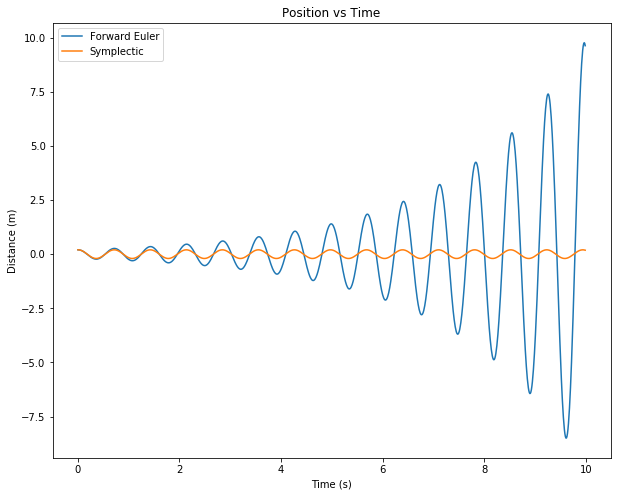

In [17]:
#Plotting position vs time and comparing both methods
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0, int(t/dt) - 1): 
    fwdeuler(i)    
plt.plot(t_range, y_data, label = 'Forward Euler')

#Symplectic Euler Plot
for i in range(0, int(t/dt) - 1):
    symplectic(i)
plt.plot(t_range, y_data, label = 'Symplectic')

#Setting title and axis labels
plt.title("Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

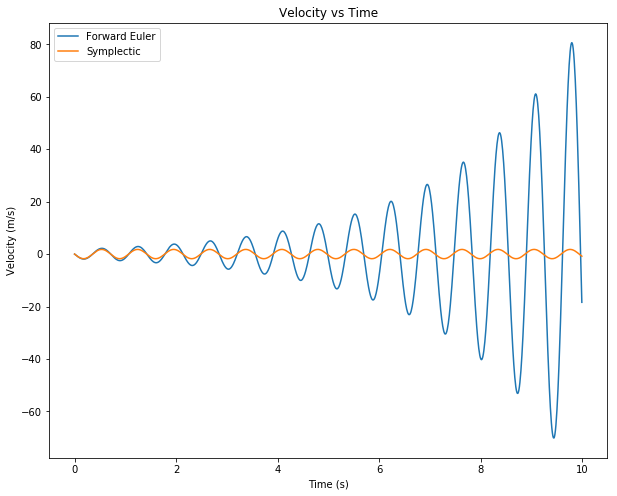

In [18]:
#Plotting velocity vs time and comparing both methods
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0, int(t/dt) - 1): 
    fwdeuler(i)    
plt.plot(t_range, v_data, label = 'Forward Euler')

#Symplectic Euler Plot
for i in range(0, int(t/dt) - 1):
    symplectic(i)
plt.plot(t_range, v_data, label = 'Symplectic')

#Setting title and axis labels
plt.title("Velocity vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.show()

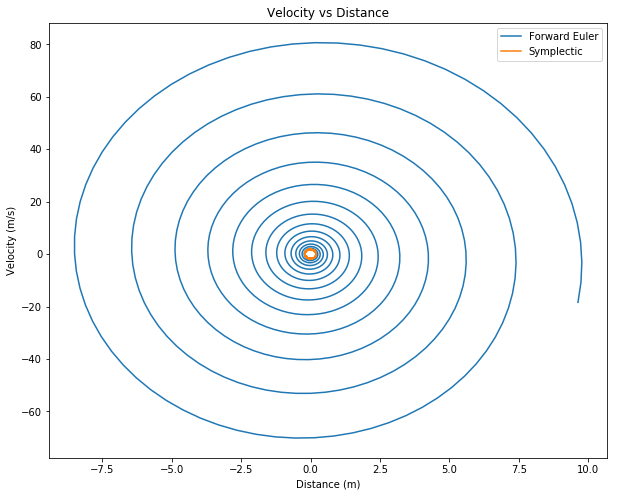

In [19]:
#Plotting velocity vs position and comparing both methods
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0, int(t/dt) - 1): 
    fwdeuler(i)    
plt.plot(y_data, v_data, label = 'Forward Euler')

#Symplectic Euler Plot
for i in range(0, int(t/dt) - 1):
    symplectic(i)
plt.plot(y_data, v_data, label = 'Symplectic')

#Setting title and axis labels
plt.title("Velocity vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.show()

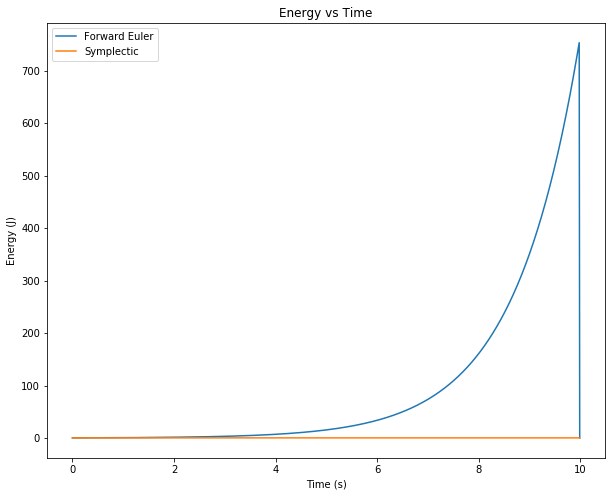

In [20]:
#Plotting energy vs time and comparing both methods
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0, int(t/dt) - 1): 
    fwdeuler(i)    
plt.plot(t_range, tot_energy, label = 'Forward Euler')

#Symplectic Euler Plot
for i in range(0, int(t/dt) - 1):
    symplectic(i)
plt.plot(t_range, tot_energy, label = 'Symplectic')

#Setting title and axis labels
plt.title("Energy vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.legend()
plt.show()

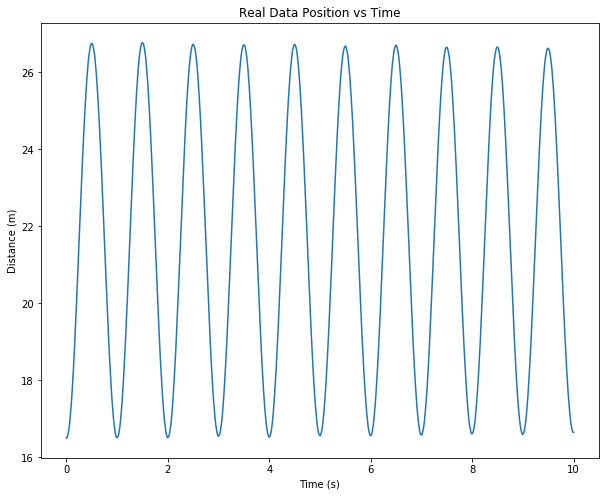

In [21]:
real_data = np.loadtxt('position data.txt', skiprows=2)
real_t, real_y, real_yerror = np.hsplit(real_data, 3)
plt.figure(figsize = (10, 8))
plt.plot(np.linspace(0., 10.0, real_y.shape[0]), real_y)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('Real Data Position vs Time')
plt.show()

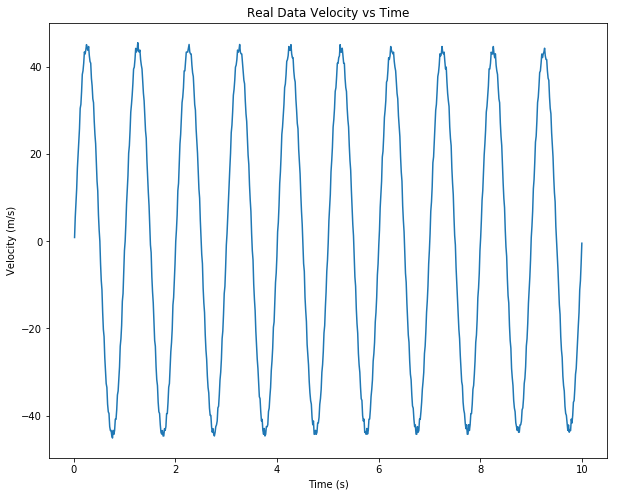

In [22]:
real_data2 = np.loadtxt('velocity data.txt', skiprows=2)
real_t, real_v = np.hsplit(real_data2, 2)
plt.figure(figsize = (10, 8))
plt.plot(np.linspace(0., 10.0, real_v.shape[0]), real_v)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Real Data Velocity vs Time')
plt.show()

In [23]:
#Defining constants and parameters
t = 120.0                           # total time interval
period = 0.71                      # period of oscillation
dt = 0.01                          # time step
wo = 2*m.pi/period                 # initial angular frequency
mass = 0.1999                      # mass of the pendulum
k = mass*wo**2                     # constant k value
y_data = np.zeros(int(t/dt))       # y-position
v_data = np.zeros(int(t/dt))       # instantaneous velocity
k_data = np.zeros(int(t/dt))       # kinetic energy
u_data = np.zeros(int(t/dt))       # potential energy
t_range = np.arange(0.0, 120.0, dt) # time interval
tot_energy = np.zeros(int(t/dt))   # total energy
y_data[0]= 0.200      

#Defining the computed gamma from our results (we did get gamma = 1.97 but that is probably very wrong)
#Mean is 21.76, original amplitude was about 5.3 m and a*(1/e) is about 1.95 which takes about 80 seconds to get to
a_1e = 1.946818003
ta_1e = 80
gamma = 2/ta_1e
    
#Defining the new integration with dampening
def dampint(steps):
    y_data[steps+1] = y_data[steps] + dt*v_data[steps]
    v_data[steps+1] = v_data[steps] - dt*((k/mass)*y_data[steps+1]+gamma*v_data[steps])
    k_data[steps] = 0.5*mass*v_data[steps]**2
    u_data[steps] = 0.5*k*y_data[steps]**2
    tot_energy[steps] = k_data[steps] + u_data[steps]

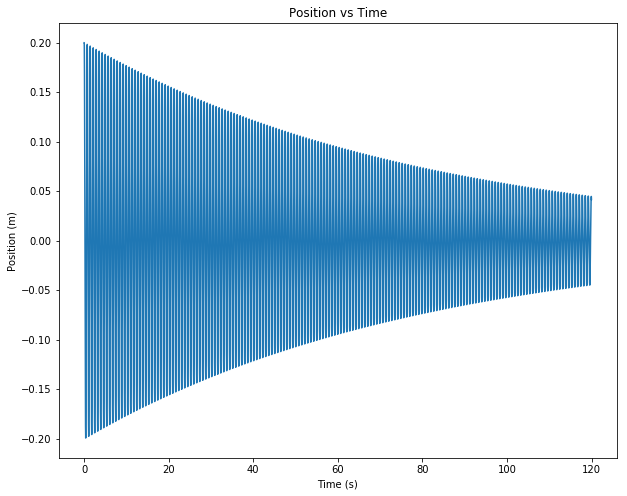

In [24]:
#Plotting position vs time
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0,int(t/dt) - 1):
    dampint(i)
plt.plot(t_range, y_data)

#Setting title and axis labels
plt.title("Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()

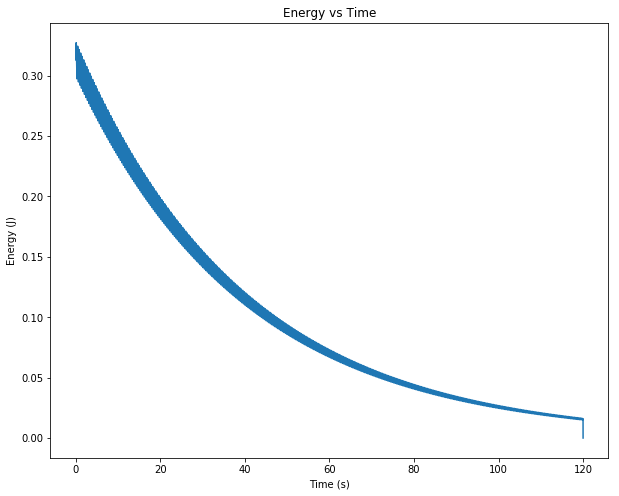

In [25]:
#Plotting energy vs time
#Setting figure size
plt.figure(figsize=(10,8))

#Forward Euler Plot
for i in range(0,int(t/dt) -1):
    dampint(i)
plt.plot(t_range, tot_energy)

#Setting title and axis labels
plt.title("Energy vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

Zooming into the previous two plots to see more clearly what is going on


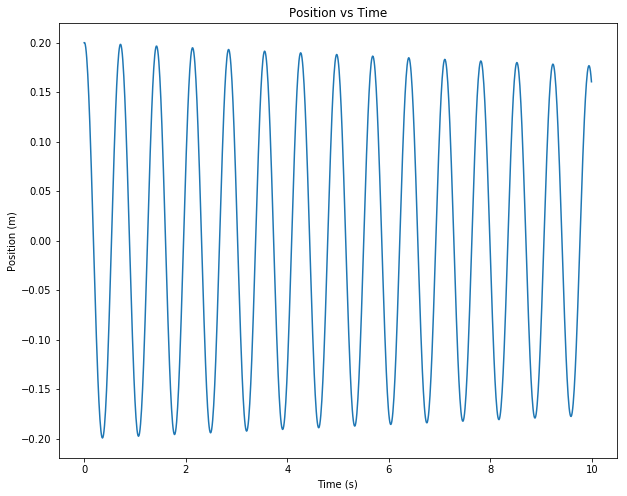

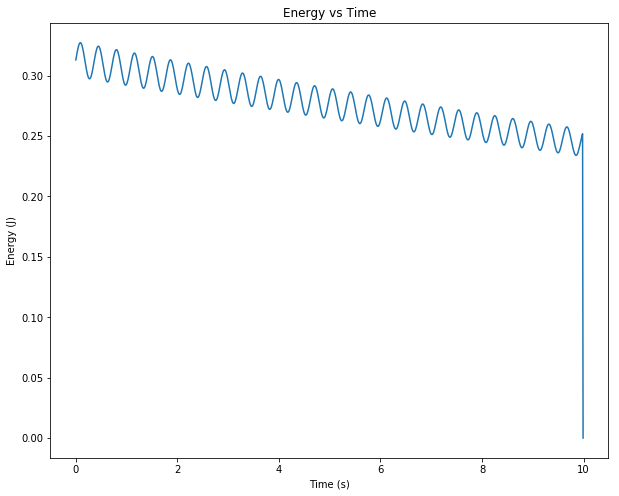

In [31]:
#A closer zoomed in view
print('Zooming into the previous two plots to see more clearly what is going on')

#Plotting position vs time
#Setting figure size
plt.figure(figsize=(10,8))

#Forawrd Euler Plot
for i in range(0,int(t/dt) - 1):
    dampint(i)
plt.plot(t_range, y_data)

#Setting title and axis labels
plt.title("Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()

#Plotting energy vs time
#Setting figure size
plt.figure(figsize=(10,8))

#Forward Euler Plot
for i in range(0,int(t/dt) -1):
    dampint(i)
plt.plot(t_range, tot_energy)

#Setting title and axis labels
plt.title("Energy vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.show()

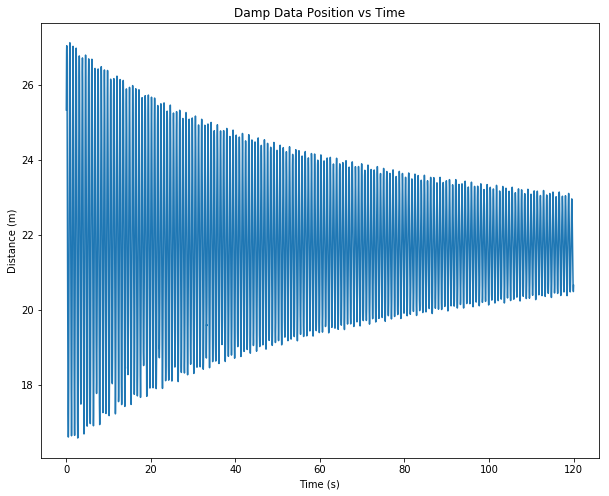

In [27]:
damp_data = np.loadtxt('damped position.txt', skiprows=2)
damp_t, damp_y, damp_yerror = np.hsplit(damp_data, 3)
plt.figure(figsize = (10, 8))
plt.plot(np.linspace(0., 120.0, damp_y.shape[0]), damp_y)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('Damp Data Position vs Time')
plt.show()

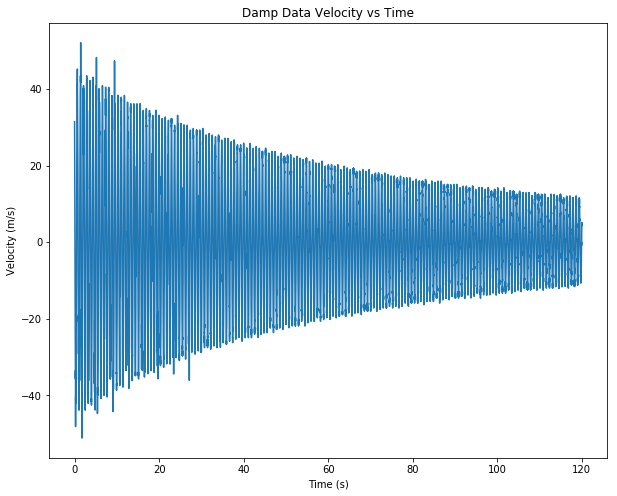

In [28]:
damp_data2 = np.loadtxt('damped velocity.txt', skiprows=2)
damp_t, damp_v = np.hsplit(damp_data2, 2)
plt.figure(figsize = (10, 8))
plt.plot(np.linspace(0., 120.0, damp_v.shape[0]), damp_v)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Damp Data Velocity vs Time')
plt.show()

In [21]:
(1.225*0.45*0.101)/(1.825*(10**(-5)))

3050.7534246575347